In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

dataTrain = pd.read_csv('house1.csv')

dataTrain.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [3]:
type(dataTrain)

pandas.core.frame.DataFrame

In [4]:
dataTrain.shape

(545, 13)

In [5]:
dataTrain.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

In [6]:
dataTrain = dataTrain.dropna()

In [7]:
dataTrain.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

In [8]:
dataTrain.shape

(545, 13)

In [9]:
dataTrain.dtypes

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
price                int64
dtype: object

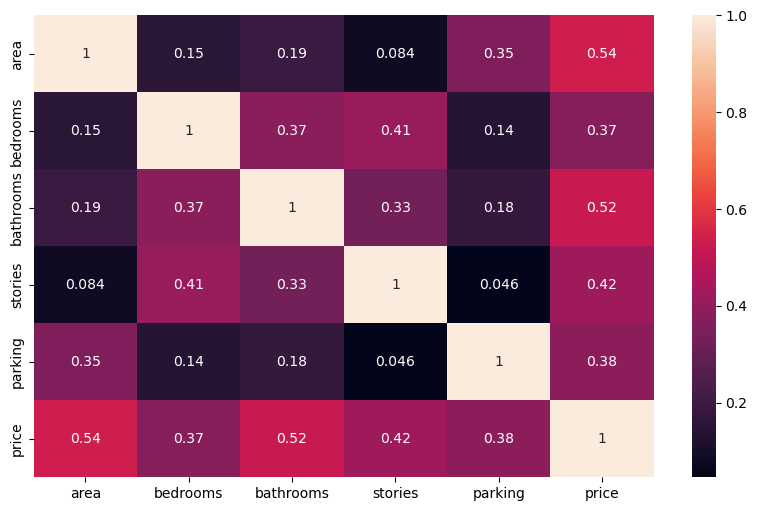

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
corr = dataTrain.corr()

sns.heatmap(corr,annot=True)
plt.show()

In [13]:
dataTrain.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


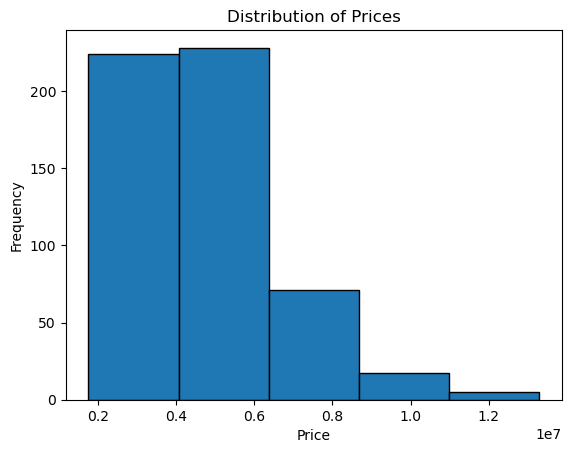

In [14]:
import matplotlib.pyplot as plt

dataTrain['price'].plot(kind = 'hist', bins = 5, edgecolor='black')   # 5 bins are used
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [15]:
dataTrain.describe(include = 'object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

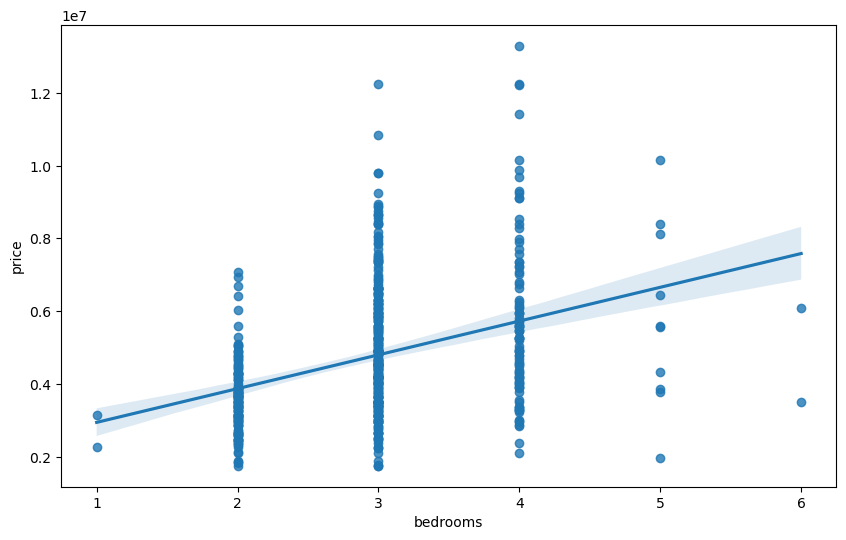

In [16]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="bedrooms", y="price", data=dataTrain)

In [17]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['bedrooms'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.36649402577386847  with a P-value of P = 9.080301855816951e-19


<AxesSubplot:xlabel='stories', ylabel='price'>

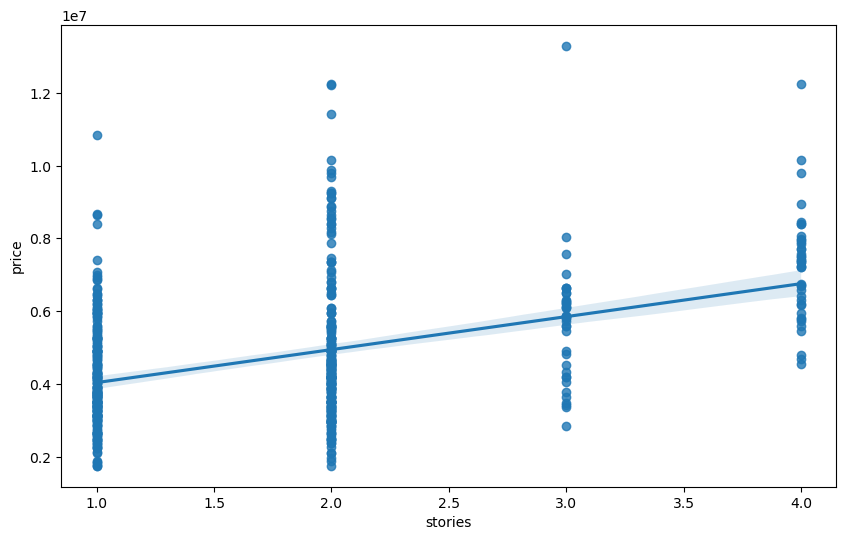

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(x="stories", y="price", data=dataTrain)

In [19]:
pearson_coef, p_value = stats.pearsonr(dataTrain['stories'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.4207123661886167  with a P-value of P = 8.668397383958351e-25


<AxesSubplot:xlabel='parking', ylabel='price'>

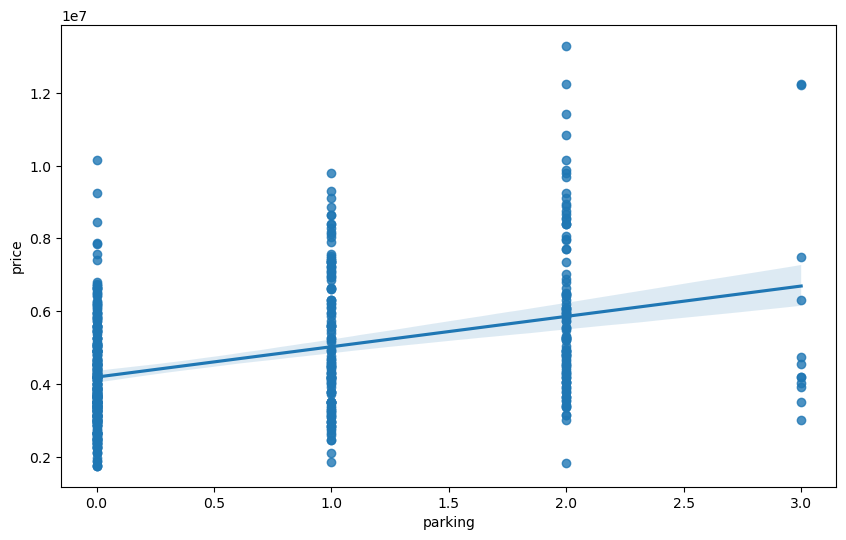

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(x="parking", y="price", data=dataTrain)

In [21]:
pearson_coef, p_value = stats.pearsonr(dataTrain['parking'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3843936486357264  with a P-value of P = 1.2383784426350081e-20


<AxesSubplot:xlabel='mainroad', ylabel='price'>

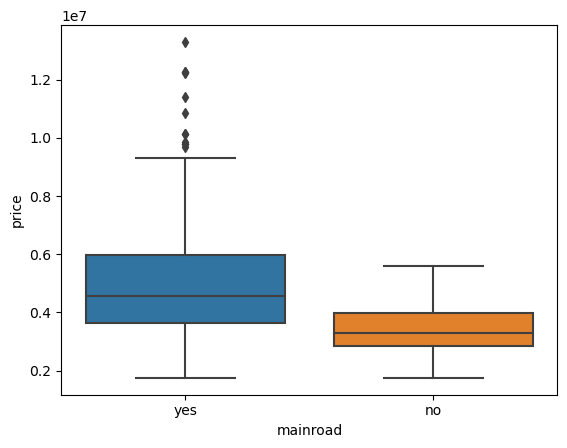

In [22]:
sns.boxplot(x="mainroad", y="price", data=dataTrain)

<AxesSubplot:xlabel='guestroom', ylabel='price'>

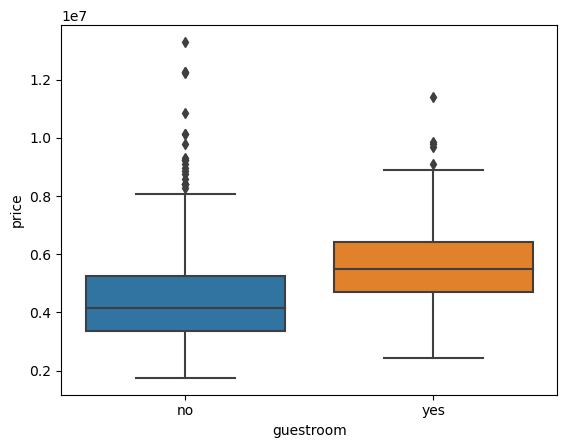

In [23]:
sns.boxplot(x="guestroom", y="price", data=dataTrain)

<AxesSubplot:xlabel='basement', ylabel='price'>

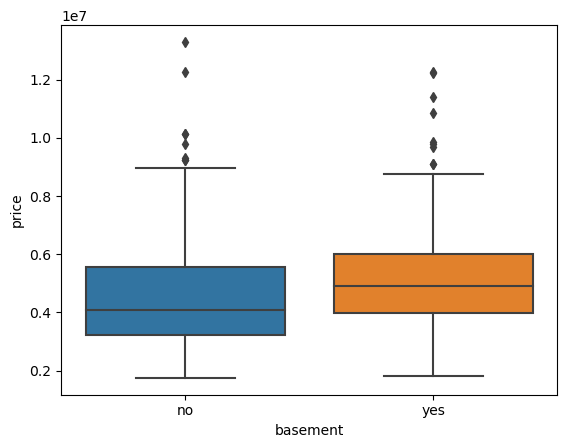

In [24]:
sns.boxplot(x="basement", y="price", data=dataTrain)

<AxesSubplot:xlabel='hotwaterheating', ylabel='price'>

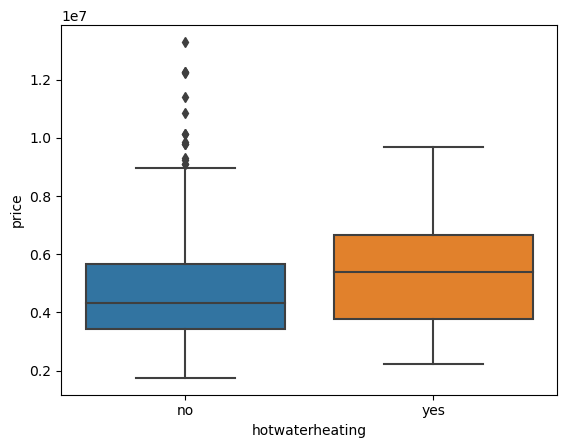

In [25]:
sns.boxplot(x="hotwaterheating", y="price", data=dataTrain)

<AxesSubplot:xlabel='airconditioning', ylabel='price'>

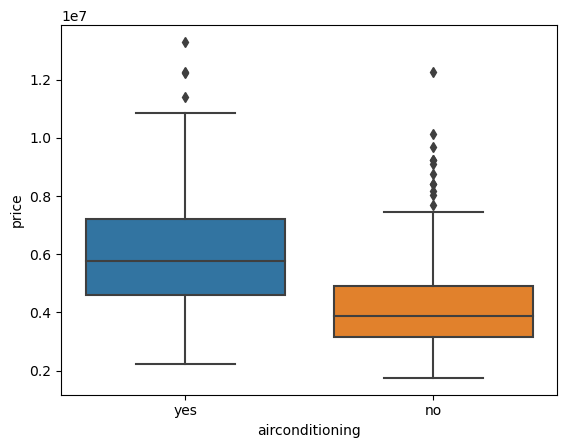

In [26]:
sns.boxplot(x="airconditioning", y="price", data=dataTrain)

<AxesSubplot:xlabel='furnishingstatus', ylabel='price'>

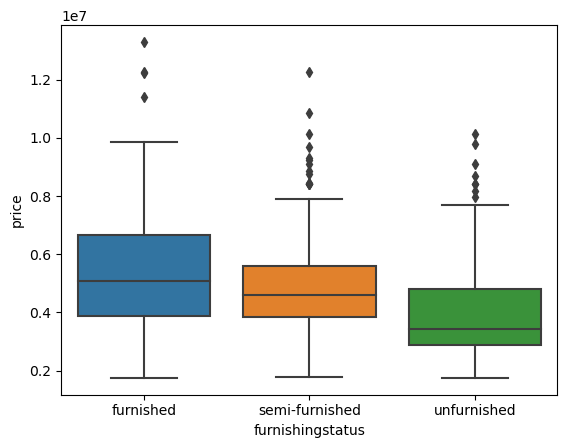

In [27]:
sns.boxplot(x="furnishingstatus", y="price", data=dataTrain)

<AxesSubplot:xlabel='prefarea', ylabel='price'>

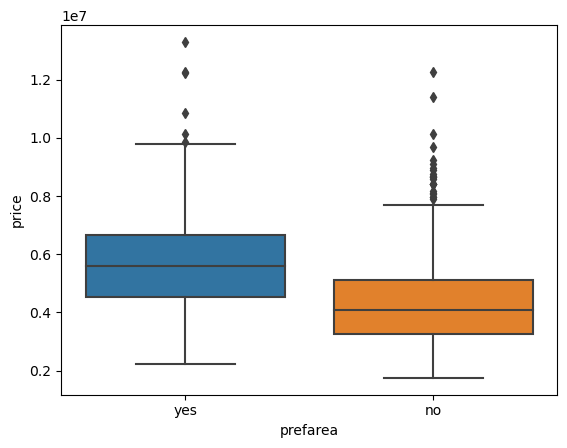

In [28]:
sns.boxplot(x="prefarea", y="price", data=dataTrain)

In [30]:
dataTrain.drop(['prefarea'], axis = 1, inplace = True)

In [31]:
dataTrain.shape

(545, 12)

In [34]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.area = labelencoder.fit_transform(dataTrain.area)
dataTrain.bedrooms = labelencoder.fit_transform(dataTrain.bedrooms)
dataTrain.bathrooms = labelencoder.fit_transform(dataTrain.bathrooms)
dataTrain.stories = labelencoder.fit_transform(dataTrain.stories)

dataTrain.mainroad = labelencoder.fit_transform(dataTrain.mainroad)
dataTrain.guestroom = labelencoder.fit_transform(dataTrain.guestroom)
dataTrain.basement = labelencoder.fit_transform(dataTrain.basement)
dataTrain.hotwaterheating = labelencoder.fit_transform(dataTrain.hotwaterheating)

dataTrain.airconditioning = labelencoder.fit_transform(dataTrain.airconditioning)
dataTrain.parking = labelencoder.fit_transform(dataTrain.parking)

dataTrain.furnishingstatus = labelencoder.fit_transform(dataTrain.furnishingstatus)


In [35]:
dataTrain.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,price
0,232,3,1,2,1,0,0,0,1,2,0,13300000
1,260,3,3,3,1,0,0,0,1,3,0,12250000
2,268,2,1,1,1,0,1,0,0,2,1,12250000
3,237,3,1,1,1,0,1,0,1,3,0,12215000
4,232,3,0,1,1,1,1,0,1,2,0,11410000
5,237,2,2,0,1,0,1,0,1,2,1,10850000
6,256,3,2,3,1,0,0,0,1,2,1,10150000
7,283,4,2,1,1,0,0,0,0,0,2,10150000
8,249,3,0,1,1,1,1,0,1,2,0,9870000
9,172,2,1,3,1,1,0,0,1,1,2,9800000


In [36]:
import scipy.stats as stats
dataTrain = stats.zscore(dataTrain)

In [37]:
dataTrain

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,price
0,1.270280,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,-1.406286,4.566365
1,1.638750,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-1.406286,4.004484
2,1.744027,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.091662,4.004484
3,1.336078,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,-1.406286,3.985755
4,1.270280,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-1.406286,3.554979
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.269532,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.222962,-1.576868
541,-1.585363,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.091662,-1.605149
542,-0.835263,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,1.222962,-1.614327
543,-1.322170,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-1.406286,-1.614327


In [39]:
x_train=dataTrain.iloc[:,0:11]
y_train=dataTrain.iloc[:,11]

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)

In [41]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
454,-0.124642,0.047278,-0.570187,0.224410,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.805741,1.222962
392,-0.479953,0.047278,-0.570187,0.224410,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.091662
231,-0.229920,0.047278,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.091662
271,-1.743279,2.759560,-0.570187,0.224410,-2.465344,-0.465315,1.361397,-0.219265,-0.679063,-0.805741,-0.091662
250,-0.927381,0.047278,-0.570187,1.378217,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.091662


In [42]:
y_train.head()

454   -0.868898
392   -0.677858
231   -0.041060
271   -0.228353
250   -0.134707
Name: price, dtype: float64

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [44]:
y_pred1 = model_mlr.predict(x_train)

In [45]:
y_train[0]

4.566365125868969

In [46]:
y_pred1[0]

-0.1489784415933332

In [47]:
mse1 = mean_squared_error(y_train, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.35997465590605143


In [48]:
mae1= mean_absolute_error(y_train, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  0.4391031714537419


In [49]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

In [50]:
y_pred2 = model_rf.predict(x_train)

In [51]:
mse2 = mean_squared_error(y_train, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  0.06007904305983835


In [52]:
mae2= mean_absolute_error(y_train, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.17321897818113619


In [53]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [54]:
y_pred3 = model_lm.predict(x_train)

In [55]:
mae3= mean_absolute_error(y_train, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.7712138129559131


In [56]:
mse3 = mean_squared_error(y_train, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  1.0028763863933647


In [57]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [58]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.439103
1,Random Forest,0.173219
2,LASSO,0.771214


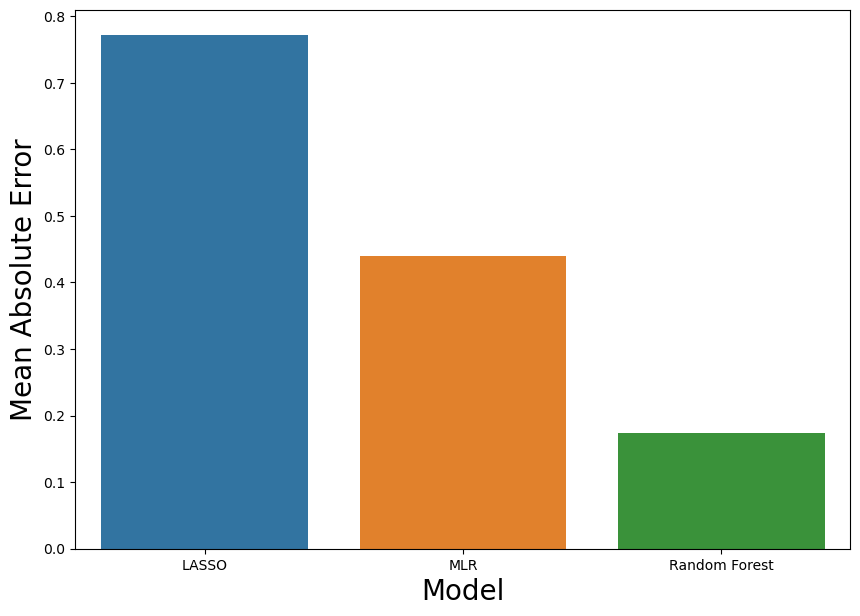

In [59]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()